<a href="https://colab.research.google.com/github/pranavgarg1506/statistics/blob/main/Statistics_%E2%80%94_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Code For Statistics -- 1
## https://pranavgarg97.medium.com/statistics-i-302d540ee4b1

import numpy as np
import statistics
from  scipy import stats

elements = [13,56,3,78,23,87,4,3,51,43]


<h2> Central Tendancy </h2>

In [2]:
## Mean
mean_value = np.mean(elements)
print("Mean Value of the elements",mean_value)

Mean Value of the elements 36.1


In [3]:
## Median
median_value = np.median(elements)
print("Median Value of the elements",median_value)

Median Value of the elements 33.0


In [4]:
## Mode
mode_value = statistics.mode(elements)
print("Mode Value of the elements",mode_value)

Mode Value of the elements 3


<h2> Variability </h2>

In [5]:
## variance
var_value = np.var(elements)
print("Variance Value of the elements",var_value)

Variance Value of the elements 893.8900000000001


In [6]:
## standard Deviation
std_value = np.std(elements)
print("Standard Dev. Value of the elements",std_value)

Standard Dev. Value of the elements 29.89799324369447


In [7]:
## coefficient Of Variation
cv_value = std_value / mean_value
print("Coeficient Variation Value of the elements",cv_value)

Coeficient Variation Value of the elements 0.8281992588281016


In [8]:
## Covariance
x = [1,2,3,4,5,6,7]
y = [5,6,10,17,16,21,24]

mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

cov_value = sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / len(x)
print("Covariance Value is",cov_value)
print("value is positive")

Covariance Value is 13.285714285714286
value is positive


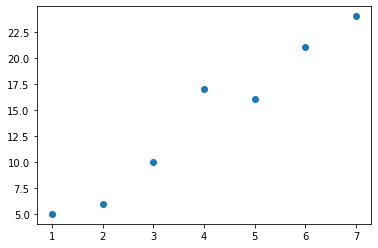

In [9]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

In [10]:
## Corelation Coefficeint (r-value)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
r_value


0.9781348514446356

As we can see that the r value is very high for x and y and graph is also showing a positive corelation between x and y

<h3> Combining all the Descriptional Stats in a function</h3>

In [11]:
import numpy as np
import statistics

def getStatisticsData(obj, **args):
  '''
  input arguments
  obj: type supported (list, ndarray)
  args:  roundoff (default 2)


  output
  dict containing key value pair
  'mean', 'median', 'mode', 'variance', 'std_dev'

  '''
  if 'roundoff' in args.keys():
    roundoff = args['roundoff']
  else:
    roundoff = 2

  ans_dic = {}
  ans_dic['mean'] = round(np.mean(obj),roundoff)
  ans_dic['median'] = round(np.median(obj),roundoff)
  ans_dic['mode'] = round(statistics.mode(obj),roundoff)
  ans_dic['variance'] = round(np.var(obj),roundoff)
  ans_dic['std_dev'] = round(np.std(obj),roundoff)
  ans_dic['cv_value'] = round( np.std(obj) / np.mean(obj),roundoff )

  return ans_dic



In [12]:
all_vals = getStatisticsData(elements,roundoff=3)
print(all_vals)

{'mean': 36.1, 'median': 33.0, 'mode': 3, 'variance': 893.89, 'std_dev': 29.898, 'cv_value': 0.828}


In [13]:
## find outlier in the dataset

## outlier can be found with the help of the beloww concept:-
## outlier does not lie below Lower Bound and above the Higher Bound
## sort the data
## find Q1 and Q3 and take diff of them
## Lower Bound == Q1 - (1.5 * (Q3 - Q1))
## Higher Bound == Q3 + (1.5 * (Q3 - Q1))

elements = [13,56,3,78,23,87,4,3,51,43,200]
sorted_ele = np.sort(elements)

Q1 = np.percentile(sorted_ele, 25)
Q3 = np.percentile(sorted_ele, 75)

IQR = Q3 - Q1
print("Q1 is", Q1)
print("Q3 is", Q3)
print("IQR is", IQR)
lower_ = Q1 - (1.5 * IQR)
higher_ = Q3 + (1.5 * IQR)

print("lower bound is:-",lower_,"and higher bound is:-", higher_)
outlier = []
for x in sorted_ele:
  if x < lower_ or x > higher_:
    outlier.append(x)

print("outliers are:-",outlier, sep=" ", end='\n')



Q1 is 8.5
Q3 is 67.0
IQR is 58.5
lower bound is:- -79.25 and higher bound is:- 154.75
outliers are:- [200]


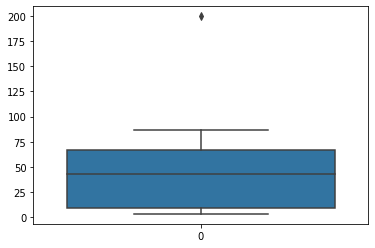

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=sorted_ele)
plt.show()